In [1]:
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import math
import gc
import pprint
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv("Train.csv")

In [3]:
test=pd.read_csv("Test.csv")

In [4]:
train=train.drop('inst_id',axis=1)
train=train.drop('instkind_nan',axis=1)
train.head(5)

,OC,sido_choongchung,sido_gangwon,sido_gyeongin,sido_gyeongsang,sido_jeonra,sido_seoul,instkind_clinic,instkind_general_hospital,instkind_hospital,instkind_nursing_hospital,instkind_traditional_clinic,instkind_traditional_hospital,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,bedCount_class
0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,22.162515,0.000000,22.099796,21.433189,16.566138,16.539187,16.398469,17.269990,19.232365,20.735886,20.720935,19.968362,16.525413,21.645374,21.582217,18.781494,0.0,20.341751,19.120425,0.000000,19.992422,19.676297,21.768639,21.126324,22.181380,0.000000,22.123814,21.447809,16.600193,17.216153,16.568091,16.749797,19.152229,20.537140,20.520624,20.076434,16.425505,21.658620,21.592994,18.798422,0.0,20.447504,19.222130,0.000000,20.099863,19.781657,21.686169,20.963246,4.143135,4.174387,0.0,3.0
1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,23.980280,9.659782,23.481393,19.521179,17.056168,16.823799,15.443340,15.495813,20.342724,19.074269,19.037270,10.917985,16.218383,19.670926,19.568364,15.878952,0.0,19.623979,19.023845,9.354666,18.934266,18.096803,18.567912,12.280544,20.078340,9.609001,19.910191,19.440285,16.978333,17.291624,15.026843,16.011168,17.025473,19.100225,19.065542,11.998936,16.044684,19.499605,19.428651,15.372413,0.0,19.505616,18.841626,9.180719,18.812726,17.568559,18.838180,12.258481,6.687109,6.701960,0.0,4.0
2,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,20.727778,20.060616,19.918561,19.507228,11.240552,10.308986,0.000000,0.000000,17.549955,19.422937,19.351593,15.906875,16.747236,18.607003,18.607003,0.000000,0.0,18.341793,18.341793,0.000000,0.000000,0.000000,19.520988,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.459586,0.693147,0.0,4.0
3,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,25.006954,0.000000,24.981392,24.182293,20.042488,20.954034,20.902985,18.973242,20.621045,23.291406,23.168630,0.000000,21.133250,24.488628,24.369258,22.095768,0.0,24.469560,24.055180,23.713241,23.388542,22.704687,23.352064,22.880092,24.925842,0.000000,24.896486,24.114795,19.982624,21.026087,20.968110,19.204088,20.546991,23.132525,23.014845,0.000000,20.934483,24.401680,24.274484,22.088313,0.0,24.354384,23.557572,22.944579,23.755157,23.437961,23.284691,22.769775,6.498282,6.498282,0.0,4.0
4,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,24.615974,0.000000,24.587275,23.920337,18.537150,21.073281,20.991191,0.000000,18.206865,22.566524,22.493677,22.134087,19.910926,24.499866,24.491560,19.219718,0.0,24.633249,24.087425,23.609762,23.767260,23.325956,18.273475,22.923325,24.596190,0.000000,24.576086,23.878565,20.208680,21.143362,21.023260,0.000000,17.301128,22.313883,22.219315,21.936761,19.908536,24.563393,24.543819,20.486709,0.0,24.663538,24.126880,23.590810,23.784786,23.370010,15.531458,22.923325,5.332719,5.288267,0.0,3.0


In [5]:
test=test.drop('inst_id',axis=1)
test=test.drop('instkind_nan',axis=1)
test.head(5)

,OC,sido_choongchung,sido_gyeongin,sido_gyeongsang,sido_jeju,sido_jeonra,sido_seoul,instkind_clinic,instkind_general_hospital,instkind_hospital,instkind_nursing_hospital,instkind_traditional_clinic,instkind_traditional_hospital,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,bedCount_class
0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,24.925341,0.000000,24.907711,24.196379,22.185153,22.312810,21.297558,18.155151,20.037430,23.978043,23.917333,20.400658,21.146200,24.595983,24.558393,20.430655,0.0,24.938218,24.717069,24.362411,23.320758,22.566842,22.563144,22.914314,24.875938,0.000000,24.860211,24.130096,22.128492,22.189377,21.179820,19.201838,20.065837,23.941738,23.887866,20.936564,20.993779,24.562759,24.497473,20.495595,0.0,24.737962,24.648885,24.338050,22.275075,22.268698,23.501178,22.914314,6.542472,6.542472,0.0,3.0
1,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,24.277401,0.000000,24.207354,23.540024,18.045409,21.406884,21.384125,0.000000,19.930422,22.491710,22.404503,20.309308,20.008954,25.042221,24.924767,15.319588,0.0,24.916963,24.463538,23.871719,23.907878,23.568175,23.411417,23.071090,24.348740,0.000000,24.378724,23.666511,19.071975,22.030075,21.424438,0.000000,18.389877,22.428690,22.321313,18.855256,20.144076,24.906747,24.904599,16.489659,0.0,24.932551,24.463273,23.909618,23.950510,23.630167,22.055404,0.000000,5.940171,5.918894,0.0,2.0
2,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,23.870014,21.656442,23.862557,23.181772,21.194483,21.046031,20.512693,0.000000,18.951403,23.261171,23.151533,22.716210,20.996276,24.106118,24.066351,18.748595,0.0,0.000000,24.066351,23.806220,0.000000,0.000000,0.000000,23.519657,23.929273,21.128798,23.890406,23.200767,19.279858,21.007586,20.254739,16.537481,17.461825,23.329063,23.260015,22.669705,20.621791,24.103856,24.047434,19.876620,0.0,0.000000,24.047434,23.806220,0.000000,0.000000,0.000000,23.519657,5.285888,5.225619,0.2,3.0
3,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,22.302379,21.446452,0.000000,0.000000,21.749187,22.880193,22.789032,0.000000,20.439834,24.932465,24.884536,0.000000,0.0,24.087758,23.982974,23.654559,21.779972,0.000000,24.574017,0.000000,0.000000,0.000000,0.000000,0.000000,22.327798,21.471250,0.000000,0.000000,21.775064,23.212245,23.144950,0.000000,20.480117,24.392173,24.307323,0.000000,0.0,23.217724,22.980460,22.170624,21.662855,0.000000,24.390483,0.000000,6.634633,6.634633,0.0,4.0
4,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,24.642667,0.000000,24.606025,23.857170,21.151439,0.000000,21.668651,0.000000,21.931233,22.783750,22.688744,18.519621,20.382809,24.882907,24.821652,21.999192,0.0,24.619492,23.943482,23.568302,23.908909,23.023490,23.844835,23.426431,24.495796,0.000000,24.428956,23.652653,21.312274,0.000000,22.090703,0.000000,22.252373,22.903426,22.786169,18.988265,20.701982,24.831791,24.819959,20.119500,0.0,24.506540,22.742900,21.916712,24.318498,23.784183,23.971502,23.436150,6.082219,5.955837,0.0,3.0


In [6]:
X_train = train.drop('OC', axis=1)
y_train = train['OC']

In [10]:
# 전체 데이터셋을 학습용 80%, 테스트용 20%로 분할
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=156)
print(X_train.shape, X_test.shape)

(240, 64) (61, 64)


# XGBoost

##### 트리 기반의 알고리즘의 앙상블 학습에서 각광받는 알고리즘 중 하나입니다.
##### GBM에 기반하고 있지만, GBM의 단점인 느린 수행시간, 과적합 규제 등을 해결한 알고리즘
##### 참고 : https://injo.tistory.com/44

- 장점 

1. 뛰어난 예측 성능 
2. GBM 대비 빠른 수행 시간
3. 과적합 규제
4. 트리 가지치기 : 긍정 이득이 없는 분할을 가지치기해 분할 수 감소
5. 자체 내장된 교차 검정 
6. 결손값 자체 처리

XGBoost는 독자적인 XGBoost 모듈과 사이킷런 프레임워크 기반의 모듈이 존재합니다.

독자적인 모듈은 고유의 API와 하이퍼파라미터를 사용하지만, 사이킷런 기반 모듈에서는 다른 Estimator와 동일한 사용법을 가지고 있습니다.

https://dining-developer.tistory.com/4


binary:logistic : 이항 분류(binary class)에 사용. 이항 분류는 대부분 이놈만 쓴다.

error / error@t : 이항 분류(binary class)에서 error는 0.5 이상을 1 미만을 0이라고 판단하고 error@t는 t 이상을 1 미만을 0이라고 판단한다.

In [9]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [8]:
import xgboost as xgb ## XGBoost 불러오기
from xgboost import plot_importance ## Feature Importance를 불러오기 위함

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
import warnings

In [11]:
# max_depth = 3, 학습률은 0.1, 예제가 이진분류이므로 목적함수(objective)는 binary:logistic(이진 로지스틱)
# 오류함수의 평가성능지표는 logloss
# 부스팅 반복횟수는 400

params = {'max_depth' : 3, # 0을 지정하면 깊이의 제한이 없음 - 너무 크면 과적합 (통상 3~10정도 적용)
         'eta' : 0.1, 
         'objective' : 'reg:linear',
         'eval_metric' : 'rmse', # 평가 세트에 적용할 성능 평가 방법
         'early_stoppings' : 100, 
         'min_child_weight': 1,
          'gamma' : 0, 
          'subsample': 0.8,
          'colsample_bytree' : 0.8,
    'scale_pos_weight' : 1}

num_rounds = 400

# early_stoppings : XGB의 경우 오류가 더 이상 개선되지 않으면 수행을 중지
# 조기중단을 위한 최소 반복횟수는 100

In [12]:
# 넘파이 형태의 학습 데이터 세트와 테스트 데이터를 DMatrix로 변환하는 예제
dtrain = xgb.DMatrix(data=X_train, label = y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

# train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval' 로 명기
wlist = [(dtrain, 'train'), (dtest,'eval')]
# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[09:15:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[09:15:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stoppings" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-rmse:0.45763	eval-rmse:0.45681
[1]	train-rmse:0.42078	eval-rmse:0.41879
[2]	train-rmse:0.38710	eval-rmse:0.38803
[3]	train-rmse:0.35768	eval-rmse:0.35867
[4]	train-rmse:0.32904	eval-rmse:0.33261
[5]	train-rmse:0.30277	eval-rmse:0.31006
[6]	train-rmse:0.28103	eval-rmse:0.29450
[7]	train-rmse:0.26061	eval-rmse:0.27816
[8]	train-rmse:0.24510	eval-rmse:0.26461
[9]	train-rmse:0.22992	eval-rm

[180]	train-rmse:0.06827	eval-rmse:0.20808
[181]	train-rmse:0.06822	eval-rmse:0.20820
[182]	train-rmse:0.06818	eval-rmse:0.20826
[183]	train-rmse:0.06819	eval-rmse:0.20857
[184]	train-rmse:0.06825	eval-rmse:0.20885
[185]	train-rmse:0.06812	eval-rmse:0.20893
[186]	train-rmse:0.06819	eval-rmse:0.20908
[187]	train-rmse:0.06809	eval-rmse:0.20894
[188]	train-rmse:0.06799	eval-rmse:0.21057
[189]	train-rmse:0.06795	eval-rmse:0.21056
[190]	train-rmse:0.06792	eval-rmse:0.21078
[191]	train-rmse:0.06809	eval-rmse:0.20980
[192]	train-rmse:0.06803	eval-rmse:0.20988
[193]	train-rmse:0.06792	eval-rmse:0.21008
[194]	train-rmse:0.06791	eval-rmse:0.21018
[195]	train-rmse:0.06778	eval-rmse:0.21022
[196]	train-rmse:0.06771	eval-rmse:0.21021
[197]	train-rmse:0.06780	eval-rmse:0.21017
[198]	train-rmse:0.06770	eval-rmse:0.21019
[199]	train-rmse:0.06759	eval-rmse:0.21020
[200]	train-rmse:0.06753	eval-rmse:0.21016
[201]	train-rmse:0.06744	eval-rmse:0.21010
[202]	train-rmse:0.06738	eval-rmse:0.21008
[203]	train

[371]	train-rmse:0.06539	eval-rmse:0.21279
[372]	train-rmse:0.06530	eval-rmse:0.21276
[373]	train-rmse:0.06535	eval-rmse:0.21258
[374]	train-rmse:0.06536	eval-rmse:0.21226
[375]	train-rmse:0.06534	eval-rmse:0.21230
[376]	train-rmse:0.06528	eval-rmse:0.21184
[377]	train-rmse:0.06526	eval-rmse:0.21183
[378]	train-rmse:0.06526	eval-rmse:0.21187
[379]	train-rmse:0.06529	eval-rmse:0.21188
[380]	train-rmse:0.06527	eval-rmse:0.21185
[381]	train-rmse:0.06526	eval-rmse:0.21184
[382]	train-rmse:0.06525	eval-rmse:0.21183
[383]	train-rmse:0.06523	eval-rmse:0.21179
[384]	train-rmse:0.06534	eval-rmse:0.21178
[385]	train-rmse:0.06531	eval-rmse:0.21176
[386]	train-rmse:0.06530	eval-rmse:0.21176
[387]	train-rmse:0.06529	eval-rmse:0.21181
[388]	train-rmse:0.06527	eval-rmse:0.21181
[389]	train-rmse:0.06533	eval-rmse:0.21188
[390]	train-rmse:0.06531	eval-rmse:0.21190
[391]	train-rmse:0.06523	eval-rmse:0.21200
[392]	train-rmse:0.06517	eval-rmse:0.21228
[393]	train-rmse:0.06521	eval-rmse:0.21202
[394]	train

In [13]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시: ', preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.981 0.841 1.011 0.944 1.038 1.004 0.994 0.972 1.031 0.986]
예측값 10개만 표시:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [14]:
# 혼동행렬, 정확도, 정밀도, 재현율, F1, AUC 불러오기

def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))

In [15]:
get_clf_eval(y_test, preds)

오차행렬:
 [[ 0  2]
 [ 1 58]]

정확도: 0.9508
정밀도: 0.9667
재현율: 0.9831
F1: 0.9748


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

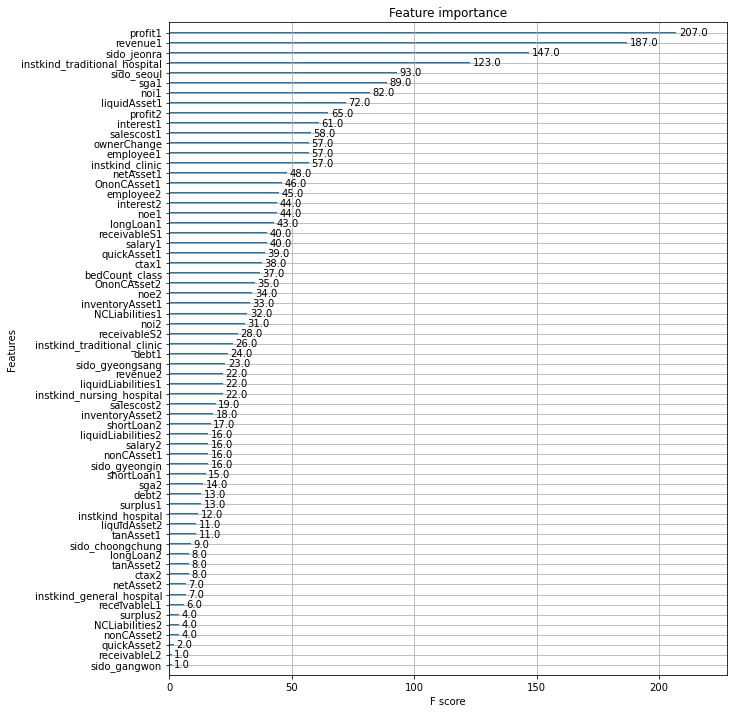

In [16]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

# Feature importance를 시각화할 때,
# → 기본 평가 지료로 f1스코어를 기반으로 각 feature의 중요도를 나타냅니다.
# → 사이킷런 래퍼는 estimator 객체의 featureimportances 속성을 이용해 시각화 코드를 직접 작성해야 합니다.
# → 반면, 파이썬 래퍼는 plot_importance()를 이용해 바로 피처 중요 코드를 시각화

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

# binary

In [17]:
# max_depth = 3, 학습률은 0.1, 예제가 이진분류이므로 목적함수(objective)는 binary:logistic(이진 로지스틱)
# 오류함수의 평가성능지표는 logloss
# 부스팅 반복횟수는 400

params = {'max_depth' : 3, # 0을 지정하면 깊이의 제한이 없음 - 너무 크면 과적합 (통상 3~10정도 적용)
         'eta' : 0.1, 
         'objective' : 'binary:logistic',
         'eval_metric' : 'rmse', # 평가 세트에 적용할 성능 평가 방법
         'early_stoppings' : 100, 
         'min_child_weight': 1,
          'gamma' : 0, 
          'subsample': 0.8,
          'colsample_bytree' : 0.8,
    'scale_pos_weight' : 1}

num_rounds = 400

In [18]:
# 넘파이 형태의 학습 데이터 세트와 테스트 데이터를 DMatrix로 변환하는 예제
dtrain = xgb.DMatrix(data=X_train, label = y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

# train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval' 로 명기
wlist = [(dtrain, 'train'), (dtest,'eval')]
# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[09:17:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stoppings" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-rmse:0.45959	eval-rmse:0.46081
[1]	train-rmse:0.42472	eval-rmse:0.42461
[2]	train-rmse:0.39362	eval-rmse:0.39302
[3]	train-rmse:0.36571	eval-rmse:0.36533
[4]	train-rmse:0.33976	eval-rmse:0.34163
[5]	train-rmse:0.31707	eval-rmse:0.32183
[6]	train-rmse:0.29776	eval-rmse:0.30586
[7]	train-rmse:0.28109	eval-rmse:0.29013
[8]	train-rmse:0.26594	eval-rmse:0.27653
[9]	train-rmse:0.25235	eval-rmse:0.26558
[10]	train-rmse:0.24095	eval-rmse:0.25367
[11]	train-rmse:0.22943	eval-rmse:0.24624
[12]	train-rmse:0.21873	eval-rmse:0.23830
[13]	train-rmse:0.21008	eval-rmse:0.2327

[184]	train-rmse:0.07973	eval-rmse:0.21285
[185]	train-rmse:0.07963	eval-rmse:0.21303
[186]	train-rmse:0.07959	eval-rmse:0.21274
[187]	train-rmse:0.07956	eval-rmse:0.21253
[188]	train-rmse:0.07979	eval-rmse:0.21282
[189]	train-rmse:0.07968	eval-rmse:0.21282
[190]	train-rmse:0.07958	eval-rmse:0.21294
[191]	train-rmse:0.07941	eval-rmse:0.21306
[192]	train-rmse:0.07937	eval-rmse:0.21332
[193]	train-rmse:0.07934	eval-rmse:0.21288
[194]	train-rmse:0.07976	eval-rmse:0.21284
[195]	train-rmse:0.07965	eval-rmse:0.21287
[196]	train-rmse:0.07946	eval-rmse:0.21317
[197]	train-rmse:0.07936	eval-rmse:0.21299
[198]	train-rmse:0.07917	eval-rmse:0.21308
[199]	train-rmse:0.07896	eval-rmse:0.21316
[200]	train-rmse:0.07934	eval-rmse:0.21218
[201]	train-rmse:0.07924	eval-rmse:0.21241
[202]	train-rmse:0.07915	eval-rmse:0.21252
[203]	train-rmse:0.07879	eval-rmse:0.21250
[204]	train-rmse:0.07867	eval-rmse:0.21243
[205]	train-rmse:0.07856	eval-rmse:0.21245
[206]	train-rmse:0.07847	eval-rmse:0.21277
[207]	train

[375]	train-rmse:0.07414	eval-rmse:0.21339
[376]	train-rmse:0.07421	eval-rmse:0.21324
[377]	train-rmse:0.07418	eval-rmse:0.21321
[378]	train-rmse:0.07411	eval-rmse:0.21315
[379]	train-rmse:0.07395	eval-rmse:0.21310
[380]	train-rmse:0.07392	eval-rmse:0.21319
[381]	train-rmse:0.07400	eval-rmse:0.21297
[382]	train-rmse:0.07397	eval-rmse:0.21293
[383]	train-rmse:0.07396	eval-rmse:0.21288
[384]	train-rmse:0.07381	eval-rmse:0.21285
[385]	train-rmse:0.07399	eval-rmse:0.21288
[386]	train-rmse:0.07390	eval-rmse:0.21285
[387]	train-rmse:0.07380	eval-rmse:0.21292
[388]	train-rmse:0.07384	eval-rmse:0.21295
[389]	train-rmse:0.07392	eval-rmse:0.21282
[390]	train-rmse:0.07389	eval-rmse:0.21278
[391]	train-rmse:0.07374	eval-rmse:0.21314
[392]	train-rmse:0.07381	eval-rmse:0.21337
[393]	train-rmse:0.07371	eval-rmse:0.21351
[394]	train-rmse:0.07377	eval-rmse:0.21342
[395]	train-rmse:0.07367	eval-rmse:0.21356
[396]	train-rmse:0.07375	eval-rmse:0.21386
[397]	train-rmse:0.07379	eval-rmse:0.21396
[398]	train

In [19]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시: ', preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.962 1.    0.999 0.999 0.993 1.    0.992 0.987 0.998 0.996]
예측값 10개만 표시:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [20]:
# 혼동행렬, 정확도, 정밀도, 재현율, F1, AUC 불러오기

def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))

In [21]:
get_clf_eval(y_test, preds)

오차행렬:
 [[ 0  2]
 [ 1 58]]

정확도: 0.9508
정밀도: 0.9667
재현율: 0.9831
F1: 0.9748


# params 조정 - 1

In [24]:
# max_depth = 3, 학습률은 0.1, 예제가 이진분류이므로 목적함수(objective)는 binary:logistic(이진 로지스틱)
# 오류함수의 평가성능지표는 logloss
# 부스팅 반복횟수는 400

params = {'max_depth' : 5, # 0을 지정하면 깊이의 제한이 없음 - 너무 크면 과적합 (통상 3~10정도 적용)
         'eta' : 0.1, 
         'objective' : 'binary:logistic',
         'eval_metric' : 'rmse', # 평가 세트에 적용할 성능 평가 방법
         'early_stoppings' : 100, 
         'min_child_weight': 1,
          'gamma' : 0, 
          'subsample': 0.8,
          'colsample_bytree' : 0.8,
    'scale_pos_weight' : 1}

num_rounds = 400

In [25]:
# 넘파이 형태의 학습 데이터 세트와 테스트 데이터를 DMatrix로 변환하는 예제
dtrain = xgb.DMatrix(data=X_train, label = y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

# train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval' 로 명기
wlist = [(dtrain, 'train'), (dtest,'eval')]
# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[09:20:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stoppings" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-rmse:0.45897	eval-rmse:0.46173
[1]	train-rmse:0.42289	eval-rmse:0.42520
[2]	train-rmse:0.39174	eval-rmse:0.39355
[3]	train-rmse:0.36324	eval-rmse:0.36768
[4]	train-rmse:0.33707	eval-rmse:0.34370
[5]	train-rmse:0.31440	eval-rmse:0.32379
[6]	train-rmse:0.29503	eval-rmse:0.30795
[7]	train-rmse:0.27820	eval-rmse:0.29217
[8]	train-rmse:0.26363	eval-rmse:0.27793
[9]	train-rmse:0.24971	eval-rmse:0.26674
[10]	train-rmse:0.23814	eval-rmse:0.25512
[11]	train-rmse:0.22648	eval-rmse:0.24836
[12]	train-rmse:0.21673	eval-rmse:0.24130
[13]	train-rmse:0.20760	eval-rmse:0.2357

[184]	train-rmse:0.07946	eval-rmse:0.21157
[185]	train-rmse:0.07936	eval-rmse:0.21172
[186]	train-rmse:0.07932	eval-rmse:0.21144
[187]	train-rmse:0.07927	eval-rmse:0.21125
[188]	train-rmse:0.07950	eval-rmse:0.21158
[189]	train-rmse:0.07946	eval-rmse:0.21170
[190]	train-rmse:0.07938	eval-rmse:0.21174
[191]	train-rmse:0.07915	eval-rmse:0.21152
[192]	train-rmse:0.07908	eval-rmse:0.21136
[193]	train-rmse:0.07903	eval-rmse:0.21097
[194]	train-rmse:0.07947	eval-rmse:0.21102
[195]	train-rmse:0.07937	eval-rmse:0.21104
[196]	train-rmse:0.07918	eval-rmse:0.21132
[197]	train-rmse:0.07906	eval-rmse:0.21115
[198]	train-rmse:0.07888	eval-rmse:0.21118
[199]	train-rmse:0.07878	eval-rmse:0.21138
[200]	train-rmse:0.07918	eval-rmse:0.21035
[201]	train-rmse:0.07909	eval-rmse:0.21063
[202]	train-rmse:0.07900	eval-rmse:0.21067
[203]	train-rmse:0.07866	eval-rmse:0.21064
[204]	train-rmse:0.07846	eval-rmse:0.21052
[205]	train-rmse:0.07838	eval-rmse:0.21034
[206]	train-rmse:0.07829	eval-rmse:0.21073
[207]	train

[375]	train-rmse:0.07389	eval-rmse:0.21021
[376]	train-rmse:0.07397	eval-rmse:0.21012
[377]	train-rmse:0.07395	eval-rmse:0.21010
[378]	train-rmse:0.07388	eval-rmse:0.21015
[379]	train-rmse:0.07372	eval-rmse:0.21010
[380]	train-rmse:0.07369	eval-rmse:0.21018
[381]	train-rmse:0.07378	eval-rmse:0.20999
[382]	train-rmse:0.07374	eval-rmse:0.20997
[383]	train-rmse:0.07373	eval-rmse:0.20994
[384]	train-rmse:0.07358	eval-rmse:0.20993
[385]	train-rmse:0.07376	eval-rmse:0.20994
[386]	train-rmse:0.07367	eval-rmse:0.20993
[387]	train-rmse:0.07358	eval-rmse:0.20997
[388]	train-rmse:0.07360	eval-rmse:0.20996
[389]	train-rmse:0.07368	eval-rmse:0.20988
[390]	train-rmse:0.07365	eval-rmse:0.20986
[391]	train-rmse:0.07350	eval-rmse:0.21017
[392]	train-rmse:0.07358	eval-rmse:0.21043
[393]	train-rmse:0.07348	eval-rmse:0.21052
[394]	train-rmse:0.07354	eval-rmse:0.21046
[395]	train-rmse:0.07341	eval-rmse:0.21054
[396]	train-rmse:0.07348	eval-rmse:0.21088
[397]	train-rmse:0.07353	eval-rmse:0.21093
[398]	train

In [26]:
pred_probs = xgb_model.predict(dtest)
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]

In [27]:
get_clf_eval(y_test, preds)

오차행렬:
 [[ 0  2]
 [ 1 58]]

정확도: 0.9508
정밀도: 0.9667
재현율: 0.9831
F1: 0.9748


# params 조정 - 2

In [40]:
params = {'max_depth' : 8, # 0을 지정하면 깊이의 제한이 없음 - 너무 크면 과적합 (통상 3~10정도 적용)
         'eta' : 0.2, 
         'objective' : 'binary:logistic',
         'eval_metric' : 'error', # 평가 세트에 적용할 성능 평가 방법
         'early_stoppings' : 100, 
         'min_child_weight': 1,
          'gamma' : 0, 
          'subsample': 0.8,
          'colsample_bytree' : 0.8,
    'scale_pos_weight' : 1}

num_rounds = 400

In [41]:
dtrain = xgb.DMatrix(data=X_train, label = y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

wlist = [(dtrain, 'train'), (dtest,'eval')]
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[09:36:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stoppings" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.04583	eval-error:0.06557
[1]	train-error:0.04583	eval-error:0.04918
[2]	train-error:0.04583	eval-error:0.01639
[3]	train-error:0.04167	eval-error:0.03279
[4]	train-error:0.04167	eval-error:0.03279
[5]	train-error:0.03333	eval-error:0.03279
[6]	train-error:0.03333	eval-error:0.03279
[7]	train-error:0.03333	eval-error:0.03279
[8]	train-error:0.02917	eval-error:0.03279
[9]	train-error:0.02917	eval-error:0.03279
[10]	train-error:0.03333	eval-error:0.03279
[11]	train-error:0.03333	eval-error:0.03279
[12]	train-error:0.02917	eval-error:0.03279
[13]	train-err

[175]	train-error:0.00833	eval-error:0.04918
[176]	train-error:0.00833	eval-error:0.04918
[177]	train-error:0.00833	eval-error:0.04918
[178]	train-error:0.00833	eval-error:0.04918
[179]	train-error:0.00833	eval-error:0.04918
[180]	train-error:0.00833	eval-error:0.04918
[181]	train-error:0.00833	eval-error:0.04918
[182]	train-error:0.00833	eval-error:0.04918
[183]	train-error:0.00833	eval-error:0.04918
[184]	train-error:0.00833	eval-error:0.04918
[185]	train-error:0.00833	eval-error:0.04918
[186]	train-error:0.00833	eval-error:0.04918
[187]	train-error:0.00833	eval-error:0.04918
[188]	train-error:0.00833	eval-error:0.04918
[189]	train-error:0.00833	eval-error:0.04918
[190]	train-error:0.00833	eval-error:0.04918
[191]	train-error:0.00833	eval-error:0.04918
[192]	train-error:0.00833	eval-error:0.04918
[193]	train-error:0.00833	eval-error:0.04918
[194]	train-error:0.00833	eval-error:0.04918
[195]	train-error:0.00833	eval-error:0.04918
[196]	train-error:0.00833	eval-error:0.04918
[197]	trai

[358]	train-error:0.00833	eval-error:0.04918
[359]	train-error:0.00833	eval-error:0.04918
[360]	train-error:0.00833	eval-error:0.04918
[361]	train-error:0.00833	eval-error:0.04918
[362]	train-error:0.00833	eval-error:0.04918
[363]	train-error:0.00833	eval-error:0.04918
[364]	train-error:0.00833	eval-error:0.04918
[365]	train-error:0.00833	eval-error:0.04918
[366]	train-error:0.00833	eval-error:0.04918
[367]	train-error:0.00833	eval-error:0.04918
[368]	train-error:0.00833	eval-error:0.04918
[369]	train-error:0.00833	eval-error:0.04918
[370]	train-error:0.00833	eval-error:0.04918
[371]	train-error:0.00833	eval-error:0.04918
[372]	train-error:0.00833	eval-error:0.04918
[373]	train-error:0.00833	eval-error:0.04918
[374]	train-error:0.00833	eval-error:0.04918
[375]	train-error:0.00833	eval-error:0.04918
[376]	train-error:0.00833	eval-error:0.04918
[377]	train-error:0.00833	eval-error:0.04918
[378]	train-error:0.00833	eval-error:0.04918
[379]	train-error:0.00833	eval-error:0.04918
[380]	trai

In [42]:
pred_probs = xgb_model.predict(dtest)
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]

In [43]:
get_clf_eval(y_test, preds)

오차행렬:
 [[ 0  2]
 [ 1 58]]

정확도: 0.9508
정밀도: 0.9667
재현율: 0.9831
F1: 0.9748


# params 조정 - 3

In [44]:
params = {'max_depth' : 3, # 0을 지정하면 깊이의 제한이 없음 - 너무 크면 과적합 (통상 3~10정도 적용)
         'eta' : 0.1, 
         'objective' : 'binary:logistic',
         'eval_metric' : 'error', # 평가 세트에 적용할 성능 평가 방법
         'early_stoppings' : 100, 
         'min_child_weight': 1,
          'gamma' : 0, 
          'subsample': 0.8,
          'colsample_bytree' : 0.8,
    'scale_pos_weight' : 1}

num_rounds = 400

In [45]:
dtrain = xgb.DMatrix(data=X_train, label = y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

wlist = [(dtrain, 'train'), (dtest,'eval')]
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[09:37:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stoppings" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.04583	eval-error:0.06557
[1]	train-error:0.05000	eval-error:0.03279
[2]	train-error:0.05417	eval-error:0.03279
[3]	train-error:0.05417	eval-error:0.03279
[4]	train-error:0.05000	eval-error:0.03279
[5]	train-error:0.05000	eval-error:0.03279
[6]	train-error:0.05000	eval-error:0.03279
[7]	train-error:0.05000	eval-error:0.03279
[8]	train-error:0.05000	eval-error:0.03279
[9]	train-error:0.05000	eval-error:0.03279
[10]	train-error:0.05417	eval-error:0.03279
[11]	train-error:0.05417	eval-error:0.03279
[12]	train-error:0.05417	eval-error:0.03279
[13]	train-err

[176]	train-error:0.00833	eval-error:0.04918
[177]	train-error:0.00833	eval-error:0.04918
[178]	train-error:0.00833	eval-error:0.04918
[179]	train-error:0.00833	eval-error:0.04918
[180]	train-error:0.00833	eval-error:0.04918
[181]	train-error:0.00833	eval-error:0.04918
[182]	train-error:0.00833	eval-error:0.04918
[183]	train-error:0.00833	eval-error:0.04918
[184]	train-error:0.00833	eval-error:0.04918
[185]	train-error:0.00833	eval-error:0.04918
[186]	train-error:0.00833	eval-error:0.04918
[187]	train-error:0.00833	eval-error:0.04918
[188]	train-error:0.00833	eval-error:0.04918
[189]	train-error:0.00833	eval-error:0.04918
[190]	train-error:0.00833	eval-error:0.04918
[191]	train-error:0.00833	eval-error:0.04918
[192]	train-error:0.00833	eval-error:0.04918
[193]	train-error:0.00833	eval-error:0.04918
[194]	train-error:0.00833	eval-error:0.04918
[195]	train-error:0.00833	eval-error:0.04918
[196]	train-error:0.00833	eval-error:0.04918
[197]	train-error:0.00833	eval-error:0.04918
[198]	trai

[359]	train-error:0.00833	eval-error:0.04918
[360]	train-error:0.00833	eval-error:0.04918
[361]	train-error:0.00833	eval-error:0.04918
[362]	train-error:0.00833	eval-error:0.04918
[363]	train-error:0.00833	eval-error:0.04918
[364]	train-error:0.00833	eval-error:0.04918
[365]	train-error:0.00833	eval-error:0.04918
[366]	train-error:0.00833	eval-error:0.04918
[367]	train-error:0.00833	eval-error:0.04918
[368]	train-error:0.00833	eval-error:0.04918
[369]	train-error:0.00833	eval-error:0.04918
[370]	train-error:0.00833	eval-error:0.04918
[371]	train-error:0.00833	eval-error:0.04918
[372]	train-error:0.00833	eval-error:0.04918
[373]	train-error:0.00833	eval-error:0.04918
[374]	train-error:0.00833	eval-error:0.04918
[375]	train-error:0.00833	eval-error:0.04918
[376]	train-error:0.00833	eval-error:0.04918
[377]	train-error:0.00833	eval-error:0.04918
[378]	train-error:0.00833	eval-error:0.04918
[379]	train-error:0.00833	eval-error:0.04918
[380]	train-error:0.00833	eval-error:0.04918
[381]	trai

In [46]:
pred_probs = xgb_model.predict(dtest)
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]

get_clf_eval(y_test, preds)

오차행렬:
 [[ 0  2]
 [ 1 58]]

정확도: 0.9508
정밀도: 0.9667
재현율: 0.9831
F1: 0.9748
